In [2]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

**Import the librairies **

In [3]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

**Import the different csv **

In [4]:
calendar = pd.read_csv('calendar.csv', sep=',')
listings = pd.read_csv('listings.csv', sep=',')
reviews = pd.read_csv('reviews.csv', sep=',')

**1.** get a look at the different csv

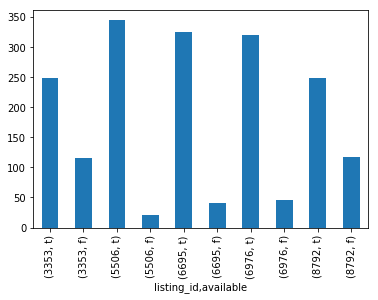

In [6]:
# availability of the differents listings
calendar.groupby('listing_id')['available'].value_counts()[:10].plot(kind="bar")

In [7]:
#differents listings
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [6]:
#differents reviews
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


**2.** Try to know if people come back to the same house and why?

In [7]:
# group the data in reviews by listing_id and reviewer_id
listings_visitor = reviews.groupby(['listing_id', 'reviewer_id'])
listings_visitor_keys = list(listings_visitor.groups.keys())

In [8]:
# try to extract the group with more than one visit in the same appartment
def number_of_visit_in_same_property(number):
    '''
    found how many times people come
    in the same house 
    Input
    - number : of listings of that
    house
    Output
    - list of dataframe of the targeted
    search
    '''
    index_listings_to_keep = []
    for j in listings_visitor_keys:
        if len(listings_visitor.get_group(j))>=number:
            index_listings_to_keep.append(listings_visitor_keys.index(j))
    
    # put all the dataframe of interest in the list
    reviews_of_interest = [listings_visitor.get_group(listings_visitor_keys[i])
                           for i in index_listings_to_keep]
    return reviews_of_interest

In [74]:
# get the list of houses with at least 5 visits of the same persons
reviews_of_interest = number_of_visit_in_same_property(5)
# take a sample
print('number of person with that number of visit {} \n'.format(len(reviews_of_interest)))
for j in range(len(reviews_of_interest)):
    reviews_of_interest_bis = reviews_of_interest[j]
    # get the list of others booking of people
    all_book = reviews[reviews['reviewer_id']==reviews_of_interest_bis['reviewer_id'].values[0]]
    # get all the booking of that person
    diff_date = list(set(all_book['date']) - set(reviews_of_interest_bis['date']))
    calendar_diff = reviews[reviews['date'].isin(diff_date)]
    if len(calendar_diff)>=1:
        print('other date is present on calendar \n')
    else:
        print('no presence \n')
    print('name: {} \n'.format(all_book['reviewer_name'].values[0]))
    print('id: {} \n'.format(all_book['reviewer_id'].values[0]))
    print('listing_id: {} \n'.format(all_book['listing_id'].values[0]))
    print('number of total book  {} \n'.format(len(all_book)))
    print('ratio same house {} \n'.format(len(reviews_of_interest_bis)/len(all_book)))
    print('========================================== \n')

number of person with that number of visit 20 

other date is present on calendar 

name: Hidefusa 

id: 3230853 

listing_id: 1529321 

number of total book  9 

ratio same house 0.6666666666666666 


other date is present on calendar 

name: Wendy 

id: 1695789 

listing_id: 1071235 

number of total book  8 

ratio same house 0.625 


other date is present on calendar 

name: Marie 

id: 12096536 

listing_id: 1321422 

number of total book  37 

ratio same house 0.2702702702702703 


other date is present on calendar 

name: Sushith 

id: 18464037 

listing_id: 205894 

number of total book  7 

ratio same house 0.8571428571428571 


other date is present on calendar 

name: Brad 

id: 23279710 

listing_id: 1391492 

number of total book  9 

ratio same house 0.8888888888888888 


other date is present on calendar 

name: Marie 

id: 12096536 

listing_id: 1321422 

number of total book  37 

ratio same house 0.2972972972972973 


other date is present on calendar 

name: Harry 



In [62]:
# get the list of houses with at least 5 visits of the same persons
reviews_of_interest = number_of_visit_in_same_property(5)
# take a sample
print('number of person with that number of visit {} \n'.format(len(reviews_of_interest)))

reviews_of_interest_bis = reviews_of_interest[0]
# get the list of others booking of people
all_book = reviews[reviews['reviewer_id']==reviews_of_interest_bis['reviewer_id'].values[0]]
# get all the booking of that person
diff_date = list(set(all_book['date']) - set(reviews_of_interest_bis['date']))
calendar_diff = calendar[calendar['date'].isin(diff_date)]
print('name: {} \n'.format(all_book['reviewer_name'].values[0]))
print('number of total book  {} \n'.format(len(all_book)))
print('ratio same house {} \n'.format(len(reviews_of_interest_bis)/len(all_book)))
print('========================================== \n')

number of person with that number of visit 20 

name: Hidefusa 

number of total book  9 

ratio same house 0.6666666666666666 




In [64]:
diff_date

['2013-10-26', '2013-11-09', '2013-12-07']